In [1]:
# Importni knižnicu numpy, ktorá je používaná na prácu s poľami.
# Slúži taktiež pre prácu napríklad v doméne lineárnej algebry a matíc. 
# ulož ju do premennej np
import numpy as np
# Importni knižnicu pandas, ktorá slúži ako rýchly, výkonný, flexibilný a 
# ľahko použiteľný nástroj na analýzu a manipuláciu s dátami
# ulož ju do premennej pd 
import pandas as pd
# importni knižnicu pyplot, ktorá je určená hlavne pre vytvárenie interaktívnych grafov a
# jednoduché prípady programového generovania grafov
# ulož ju do premennej plt 
import matplotlib.pyplot  as plt

In [2]:
# trieda Perceptron
class Perceptron():   

    # metoda __init__() - sa vykoná pri iniciovaní triedy.
    # argumenty: rychlost_ucenia - 
    #            pocet_iteracii  - čo prejde tréningovou súpravou 
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10):
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      
    
    # metoda fit() - vykonáva sa proces učenia sa 
    # argumenty: X - trénovacie vstupy matica, ktorú tvorí 0. a 2. stĺpec z datasetu
    #            y - pole naplnené očakávaným výsledkom -1 a 1  
    def fit(self, X,y):

        # pole váh, na začiatku naplnené nulami
        # šírka pola váh je 1+(pocet prvkov v riadku matice X)
        # prvým prvkom je bias
        self.vahy = np.zeros(1+ X.shape[1])

        # pole chýb, do ktorého sa zachytávajú chyby v iteráciach
        self.errors_=[]
        
        # for cyklus 
        # cyklus ide od 0 do počtu iterácií (nepočítajuc poslednú hodnotu)
        for i in range(self.n_iter):
            # vypíš, ktorá iterácia práve prebieha
            print("Iterácia " + str(i))
            # vypíš aktuálné hodnoty pola váh pred úpravou
            print("Váhy pred úpravou: " + str(self.vahy))
            # pred začiatkom cyklu, nastav premennu 'errors' na nulu
            # premenna slúži na zachytávanie chýb počas jednej iterácie
            errors = 0
            # for cycklus
            # s použitím metódy zip, ktorá vezme dva iterátory a zostrojí iterátor n-tíc, 
            # kde každá n-tica obsahuje prvky z každej iterovateľnosti.
            # argumenty: X - trénovacie vstupy matica, ktorú tvorí 0. a 2. stĺpec z datasetu
            #            y - pole naplnené očakávaným výsledkom -1 a 1  
            for matica,vystup in zip(X,y):
                # do premennej 'update', ulož násobok rýchlosti učenia s premennou 'vystup', od 
                # ktorej je odcitana hodnota z metody predikcia, ktorú metóda vrátila
                # do metódy predikcia posielame premennú 'matica'  
                update = self.eta * (vystup-self.predikcia(matica))
                # do pola váh, pridaj na pozície 1. až do konca hodnoty z premennej 'update', ktorá 
                # je vynasobená s premennou 'matica' 
                self.vahy[1:] += update*matica
                # do pola váh, pridaj na nultú pozíciu hodnotu z premennej 'update'
                self.vahy[0]+= update
                # do premennej 'errors' pridaj hodnotu z premennej 'update',
                # ktorú premeň do údajového typu int, pokiaľ je rôzna od '0.0' 
                errors += int(update !=0.0)
            
            # pridaj chybu tejto iterácie do pola chýb
            self.errors_.append(errors)
            # vypíš aktuálné hodnoty pola váh po úprave
            print("Váhy po úprave: " + str(self.vahy))
            # vypíš aktuálnu chybu za túto iteráciu
            print("Chyba: " + str(errors))
            print("-----------------------")
        # vrátť odkaz na inštančný objekt, na ktorý bol volaný. 
        return self  

    # np.dot funkcia, ktorá sa používa v metóde net_input vypočíta np.dot produkt vahy^T X
    # argumenty: X - trénovacie vstupy matica, ktorú tvorí 0. a 2. stĺpec z datasetu
    def net_input(self, X):
        # self.vahy[0] pridá nultý prvok z pola vah 
        # self.vahy[1:] pridá 1. až do konca prvky z pola vah
        return np.dot(X, self.vahy[1:])+ self.vahy[0]

    # metóda predict() - predpovedá označenia tried, ktorá sa volá v metóde 'fit'
    # argumenty: X - trénovacie vstupy matica, ktorú tvorí 0. a 2. stĺpec z datasetu
    def predikcia(self, X):
        # funkcia np.where vráti prvkoy vo vstupnom poli, kde je daná podmienka splnená. 
        # v našom prípade, ak je výstupná hodnota z metódy net_input väčšia alebo rovná '0.0', tak vráť 1, inak vrát -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
# precitaj pomocou kniznice pandas csv subor a uloz ho ako dataframe do premennej df
# ako separator pouti znak: ',' a názvy stlpcov pouzi nasledovne: 'Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class label'] 
df = pd.read_csv('/content/drive/MyDrive/Škola/NS/cvicenie_3/kosatec_data.csv', sep=',', names=['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class label'])

# nasledne vypis dataframe z premennej df 
df

,Sepal length,Sepal width,Petal length,Petal width,class label
0,5.1,3.5,1.4,0.2,kosatec_sibirsky
1,4.9,3.0,1.4,0.2,kosatec_sibirsky
2,4.7,3.2,1.3,0.2,kosatec_sibirsky
3,4.6,3.1,1.5,0.2,kosatec_sibirsky
4,5.0,3.6,1.4,0.2,kosatec_sibirsky
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,kosatec_bezlisty
146,6.3,2.5,5.0,1.9,kosatec_bezlisty
147,6.5,3.0,5.2,2.0,kosatec_bezlisty
148,6.2,3.4,5.4,2.3,kosatec_bezlisty


kosatec_sibirsky & kosatec_roznofarebny

In [4]:
# do premennej 'x' uloz údaje z dataframu 'df'. Vyber 0. a 2. stĺpec a ulož ich do dvojpola. (Sepal length a Petal length 	)
# Vyber údaje od 0 do 100 (to sú údaje pre kosatec_sibirsky & kosatec_roznofarebny) 
x = df.iloc[0:100,[0,2]].values
# vypíš počet prvkov premennej 'x'
print("Počet: " + str(len(x)))
# vypíš premennú 'x'
print("x: " + str(x))

# do premennej 'y' uloz údaje z dataframu 'df'. Vyber 4. stĺpec a ulož ho do dvojpola. (class label)
# Vyber údaje od 0 do 100 (to sú údaje pre kosatec_sibirsky & kosatec_roznofarebny) 
y = df.iloc[0:100,[4]].values
# vypíš počet prvkov premennej 'y'
print("Počet: " + str(len(y)))
# vypíš premennú 'y'
print("y: " + str(y))

Počet: 100
x: [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4

In [5]:
# do premennej 'skupinyRastlin' ulož -1 alebo 1 podľa toho, či je aktuálny prvok v 'y' 'kosatec_sibirsky' alebo nie.
# ak je 'kosatec_sibirsky' tak pripíš -1, ak nie tak 1
skupinyRastlin = np.where(y == 'kosatec_sibirsky',-1,1)

# následne vypíš premennú 'skupinyRastlin'
skupinyRastlin

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

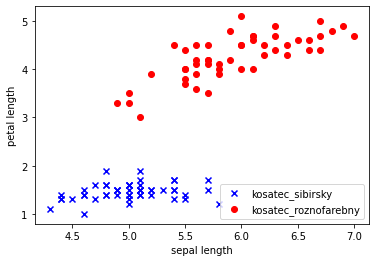

In [6]:
# vytvor bodový graf, kde ako x budú údaje z premennej x od 0 do 50 z 0. stĺpca,
# a kde ako y budú údaje z premennej x od 0 do 50 z 1. stĺpca.
# označ tieto údaje do grafu pod 'x', modrou farbou a so štítkom 'kosatec_sibirsky'
plt.scatter(x[:50,0],x[:50,1],color='blue',marker='x', label='kosatec_sibirsky')
# vytvor/pridaj do bodového grafu, kde ako x budú údaje z premennej x od 50 do 100 z 0. stĺpca,
# a kde ako y budú údaje z premennej x od 50 do 100 z 1. stĺpca.
# označ tieto údaje do grafu pod 'o', červenou farbou a so štítkom 'kosatec_bezlisty'
plt.scatter(x[50:100,0],x[50:100,1],color='red',marker='o', label='kosatec_roznofarebny')

# pre x-ovu os pripíš štítok 'sepal length'
plt.xlabel('sepal length')
# pre y-ovu os pripíš štítok 'petal length'
plt.ylabel('petal length')
# umiestni legendu do grafu
plt.legend()

Iterácia 0
Váhy pred úpravou: [0. 0. 0.]
Váhy po úprave: [0.    0.038 0.066]
Chyba: 2
-----------------------
Iterácia 1
Váhy pred úpravou: [0.    0.038 0.066]
Váhy po úprave: [0.    0.076 0.132]
Chyba: 2
-----------------------
Iterácia 2
Váhy pred úpravou: [0.    0.076 0.132]
Váhy po úprave: [-0.02   0.022  0.168]
Chyba: 3
-----------------------
Iterácia 3
Váhy pred úpravou: [-0.02   0.022  0.168]
Váhy po úprave: [-0.02   0.034  0.21 ]
Chyba: 2
-----------------------
Iterácia 4
Váhy pred úpravou: [-0.02   0.034  0.21 ]
Váhy po úprave: [-0.04  -0.068  0.182]
Chyba: 1
-----------------------
Iterácia 5
Váhy pred úpravou: [-0.04  -0.068  0.182]
Váhy po úprave: [-0.04  -0.068  0.182]
Chyba: 0
-----------------------
Iterácia 6
Váhy pred úpravou: [-0.04  -0.068  0.182]
Váhy po úprave: [-0.04  -0.068  0.182]
Chyba: 0
-----------------------
Iterácia 7
Váhy pred úpravou: [-0.04  -0.068  0.182]
Váhy po úprave: [-0.04  -0.068  0.182]
Chyba: 0
-----------------------
Iterácia 8
Váhy pred úpr

Text(0, 0.5, 'Error')

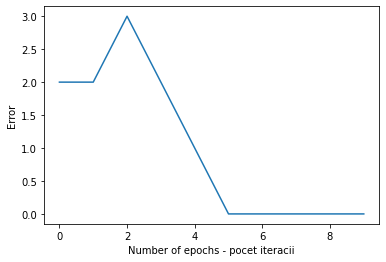

In [7]:
# vytvore objekt Perceptronu a ulož ho do premennej 'ppn'
ppn = Perceptron()
# následne z tohto objektu zavolaj metódu 'fit', do ktorej pošleš premenné 'x' a 'skupinyRastlin' 
ppn.fit(x, skupinyRastlin)
# vypíš chyby z premennej errors_ z Perceptron objektu 
print(ppn.errors_)
# následne túto premennú pošli to grafu a vytvor graf
plt.plot(ppn.errors_)
# pre x-ovu os pripíš štítok 'Number of epochs - pocet iteracii'
plt.xlabel("Number of epochs - pocet iteracii")
# pre y-ovu os pripíš štítok 'Error'
plt.ylabel("Error")

kosatec_sibirsky & kosatec_bezlisty  

In [8]:
# do premennej 'x' uloz údaje z dataframu 'df'. Vyber 0. a 2. stĺpec a ulož ich do dvojpola. (Sepal length a Petal length 	)
# Vyber údaje od 0 do 50 a údaje od 100 do 150 (to sú údaje pre kosatec_sibirsky & kosatec_bezlisty) 
x = df.iloc[pd.np.r_[0:50, 100:150,],[0,2]].values
# vypíš počet prvkov premennej 'x'
print("Počet: " + str(len(x)))
# vypíš premennú 'x'
print("x: " + str(x))

# do premennej 'y' uloz údaje z dataframu 'df'. Vyber 4. stĺpec a ulož ho do dvojpola. (class label)
# Vyber údaje od 0 do 50 a údaje od 100 do 150 (to sú údaje pre kosatec_sibirsky & kosatec_bezlisty) 
y = df.iloc[pd.np.r_[0:50, 100:150,], [4]].values
# vypíš počet prvkov premennej 'y'
print("Počet: " + str(len(y)))
# vypíš premennú 'y'
print("y: " + str(y))

Počet: 100
x: [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [6.3 6. ]
 [5.8 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [4.9 4.5]
 [7.3 6.3]
 [6.7 5.8]
 [7.2 6.1]
 [6.5 5.1]
 [6.4 5.3]
 [6.8 5.5]
 [5.7 5. ]
 [5.8 5.1]
 [6.4 5.3]
 [6.5 5.5]
 [7.7 6.7]
 [7.7 6.9]
 [6.  5. ]
 [6.9 5.7]
 [5.6 4.9]
 [7.7 6.7]
 [6.3 4.9]
 [6.7 5.7]
 [7.2 6. ]
 [6.2 4.8]
 [6.1 4.9]
 [6.4 5.6]
 [7.2 5.8]
 [7.4 6.1]
 [7.9 6.4]
 [6.4 5.6]
 [6.3 5.1]
 [6.1 5.6]
 [7.7 6.1]
 [6.3 5.6]
 [6.4 5.5]
 [6.  4.8]
 [6.9 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # This is added back by InteractiveShellApp.init_path()


In [9]:
# do premennej 'skupinyRastlin' ulož -1 alebo 1 podľa toho, či je aktuálny prvok v 'y' 'kosatec_sibirsky' alebo nie.
# ak je 'kosatec_sibirsky' tak pripíš -1, ak nie tak 1
skupinyRastlin = np.where(y == 'kosatec_sibirsky',-1,1)

# následne vypíš premennú 'skupinyRastlin'
skupinyRastlin

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

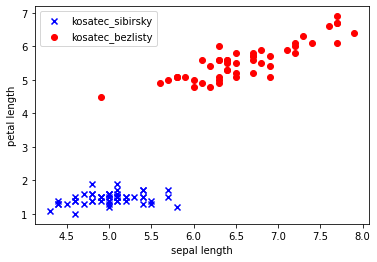

In [10]:
# vytvor bodový graf, kde ako x budú údaje z premennej x od 0 do 50 z 0. stĺpca,
# a kde ako y budú údaje z premennej x od 0 do 50 z 1. stĺpca.
# označ tieto údaje do grafu pod 'x', modrou farbou a so štítkom 'kosatec_sibirsky'
plt.scatter(x[:50,0],x[:50,1],color='blue',marker='x', label='kosatec_sibirsky')
# vytvor/pridaj do bodového grafu, kde ako x budú údaje z premennej x od 50 do 100 z 0. stĺpca,
# a kde ako y budú údaje z premennej x od 50 do 100 z 1. stĺpca.
# označ tieto údaje do grafu pod 'o', červenou farbou a so štítkom 'kosatec_bezlisty'
plt.scatter(x[50:100,0],x[50:100,1],color='red',marker='o', label='kosatec_bezlisty')

# pre x-ovu os pripíš štítok 'sepal length'
plt.xlabel('sepal length')
# pre y-ovu os pripíš štítok 'petal length'
plt.ylabel('petal length')
# umiestni legendu do grafu
plt.legend()

Iterácia 0
Váhy pred úpravou: [0. 0. 0.]
Váhy po úprave: [0.    0.024 0.092]
Chyba: 2
-----------------------
Iterácia 1
Váhy pred úpravou: [0.    0.024 0.092]
Váhy po úprave: [0.    0.048 0.184]
Chyba: 2
-----------------------
Iterácia 2
Váhy pred úpravou: [0.    0.048 0.184]
Váhy po úprave: [-0.02  -0.024  0.238]
Chyba: 3
-----------------------
Iterácia 3
Váhy pred úpravou: [-0.02  -0.024  0.238]
Váhy po úprave: [-0.04  -0.126  0.21 ]
Chyba: 1
-----------------------
Iterácia 4
Váhy pred úpravou: [-0.04  -0.126  0.21 ]
Váhy po úprave: [-0.04  -0.126  0.21 ]
Chyba: 0
-----------------------
Iterácia 5
Váhy pred úpravou: [-0.04  -0.126  0.21 ]
Váhy po úprave: [-0.04  -0.126  0.21 ]
Chyba: 0
-----------------------
Iterácia 6
Váhy pred úpravou: [-0.04  -0.126  0.21 ]
Váhy po úprave: [-0.04  -0.126  0.21 ]
Chyba: 0
-----------------------
Iterácia 7
Váhy pred úpravou: [-0.04  -0.126  0.21 ]
Váhy po úprave: [-0.04  -0.126  0.21 ]
Chyba: 0
-----------------------
Iterácia 8
Váhy pred úpr

Text(0, 0.5, 'Error')

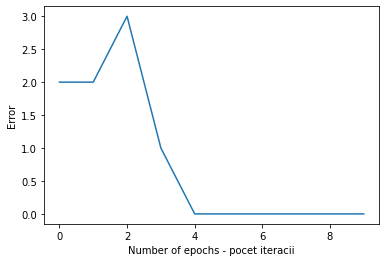

In [11]:
# vytvore objekt Perceptronu a ulož ho do premennej 'ppn'
ppn = Perceptron()
# následne z tohto objektu zavolaj metódu 'fit', do ktorej pošleš premenné 'x' a 'skupinyRastlin' 
ppn.fit(x, skupinyRastlin)
# vypíš chyby z premennej errors_ z Perceptron objektu 
print(ppn.errors_)
# následne túto premennú pošli to grafu a vytvor graf
plt.plot(ppn.errors_)
# pre x-ovu os pripíš štítok 'Number of epochs - pocet iteracii'
plt.xlabel("Number of epochs - pocet iteracii")
# pre y-ovu os pripíš štítok 'Error'
plt.ylabel("Error")

kosatec_roznofarebny & kosatec_bezlisty

In [12]:
# do premennej 'x' uloz údaje z dataframu 'df'. Vyber 0. a 2. stĺpec a ulož ich do dvojpola. (Sepal length a Petal length)
# Vyber údaje od 50 do 150 (to sú údaje pre kosatec_roznofarebny & kosatec_bezlisty) 
x = df.iloc[50:150,[0,2]].values
# vypíš počet prvkov premennej 'x'
print("Počet: " + str(len(x)))
# vypíš premennú 'x'
print("x: " + str(x))

# do premennej 'y' uloz údaje z dataframu 'df'. Vyber 4. stĺpec a ulož ho do dvojpola. (class label)
# Vyber údaje od 50 do 150 (to sú údaje pre kosatec_roznofarebny & kosatec_bezlisty) 
y = df.iloc[50:150,[4]].values
# vypíš počet prvkov premennej 'y'
print("Počet: " + str(len(y)))
# vypíš premennú 'y'
print("y: " + str(y))

Počet: 100
x: [[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]
 [6.1 4.6]
 [5.8 4. ]
 [5.  3.3]
 [5.6 4.2]
 [5.7 4.2]
 [5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]
 [6.3 6. ]
 [5.8 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [4.9 4.5]
 [7.3 6.3]
 [6.7 5.8]
 [7.2 6.1]
 [6.5 5.1]
 [6.4 5.3]
 [6.8 5.5]
 [5.7 5. ]
 [5.8 5.1]
 [6.4 5.3]
 [6.5 5.5]
 [7.7 6.7]
 [7.7 6.9]
 [6.  5. ]
 [6.9 5.7]
 [5.6 4.9]
 [7.7 6.7]
 [6.3 4.9]
 [6.7 5.7]
 [7.2 6. ]
 [6.2 4.8]
 [6.1 4.9]
 [6.4 5.6]
 [7.2 5.8]
 [7.4 6.1]
 [7.9 6.4]
 [6.4 5.6]
 [6.3 5.1]
 [6.1 5.6]
 [7.7 6.1]
 [6.3 5.6]
 [6.4 5.5]
 [6.  4.8]
 [6.9 5

In [13]:
# do premennej 'skupinyRastlin' ulož -1 alebo 1 podľa toho, či je aktuálny prvok v 'y' 'kosatec_roznofarebny' alebo nie.
# ak je 'kosatec_roznofarebny' tak pripíš -1, ak nie tak 1
skupinyRastlin = np.where(y == 'kosatec_roznofarebny',-1,1)

# následne vypíš premennú 'skupinyRastlin'
skupinyRastlin

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

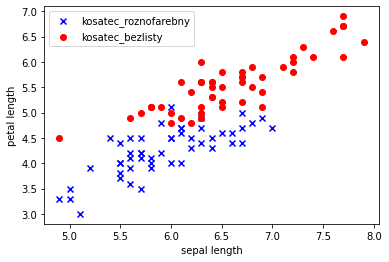

In [14]:
# vytvor bodový graf, kde ako x budú údaje z premennej x od 0 do 50 z 0. stĺpca,
# a kde ako y budú údaje z premennej x od 0 do 50 z 1. stĺpca.
# označ tieto údaje do grafu pod 'x', modrou farbou a so štítkom 'kosatec_roznofarebny'
plt.scatter(x[:50,0],x[:50,1],color='blue',marker='x', label='kosatec_roznofarebny')
# vytvor/pridaj do bodového grafu, kde ako x budú údaje z premennej x od 50 do 100 z 0. stĺpca,
# a kde ako y budú údaje z premennej x od 50 do 100 z 1. stĺpca.
# označ tieto údaje do grafu pod 'o', červenou farbou a so štítkom 'kosatec_bezlisty'
plt.scatter(x[50:100,0],x[50:100,1],color='red',marker='o', label='kosatec_bezlisty')

# pre x-ovu os pripíš štítok 'sepal length'
plt.xlabel('sepal length')
# pre y-ovu os pripíš štítok 'petal length'
plt.ylabel('petal length')
# umiestni legendu do grafu
plt.legend()

Iterácia 0
Váhy pred úpravou: [0. 0. 0.]
Váhy po úprave: [ 0.    -0.014  0.026]
Chyba: 2
-----------------------
Iterácia 1
Váhy pred úpravou: [ 0.    -0.014  0.026]
Váhy po úprave: [ 0.    -0.028  0.052]
Chyba: 2
-----------------------
Iterácia 2
Váhy pred úpravou: [ 0.    -0.028  0.052]
Váhy po úprave: [ 0.    -0.042  0.078]
Chyba: 2
-----------------------
Iterácia 3
Váhy pred úpravou: [ 0.    -0.042  0.078]
Váhy po úprave: [ 0.    -0.056  0.104]
Chyba: 2
-----------------------
Iterácia 4
Váhy pred úpravou: [ 0.    -0.056  0.104]
Váhy po úprave: [ 0.   -0.07  0.13]
Chyba: 2
-----------------------
Iterácia 5
Váhy pred úpravou: [ 0.   -0.07  0.13]
Váhy po úprave: [ 0.    -0.084  0.156]
Chyba: 2
-----------------------
Iterácia 6
Váhy pred úpravou: [ 0.    -0.084  0.156]
Váhy po úprave: [ 0.    -0.098  0.182]
Chyba: 2
-----------------------
Iterácia 7
Váhy pred úpravou: [ 0.    -0.098  0.182]
Váhy po úprave: [ 0.    -0.112  0.208]
Chyba: 2
-----------------------
Iterácia 8
Váhy pr

Text(0, 0.5, 'Error')

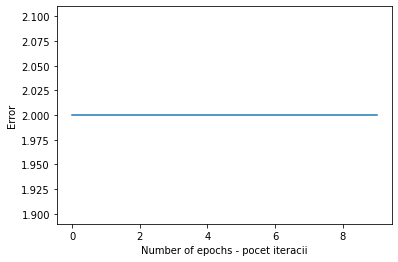

In [15]:
# vytvore objekt Perceptronu a ulož ho do premennej 'ppn'
ppn = Perceptron()
# následne z tohto objektu zavolaj metódu 'fit', do ktorej pošleš premenné 'x' a 'skupinyRastlin' 
ppn.fit(x, skupinyRastlin)
# vypíš chyby z premennej errors_ z Perceptron objektu 
print(ppn.errors_)
# následne túto premennú pošli to grafu a vytvor graf
plt.plot(ppn.errors_)
# pre x-ovu os pripíš štítok 'Number of epochs - pocet iteracii'
plt.xlabel("Number of epochs - pocet iteracii")
# pre y-ovu os pripíš štítok 'Error'
plt.ylabel("Error")